In [174]:
import pandas as pd
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 



In [175]:
# génération d'un dataset

genes =['gene'+ str(i) for i in range(1,101)]

wt= ['wt'+ str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [176]:
# création d'un dataframe

df= pd.DataFrame(columns=wt+ko, index=genes)

for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

display(df.head())
print(df.shape)



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,546,582,584,568,595,472,482,501,439,483
gene2,863,853,917,879,883,367,417,396,397,417
gene3,847,900,816,917,824,916,901,892,919,892
gene4,461,428,438,427,411,957,935,982,1009,914
gene5,110,123,124,98,125,702,733,706,679,653


(100, 10)


In [177]:
#avant d'utiliser le PCA nous allons 'scale' les données:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_col = df.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.T)



pca=PCA()
pca_data = pca.fit_transform(scaled_data)




In [178]:
# Déterminons le % de la variance globale calculé pour chaque PC

pc_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(pc_var)+1)]

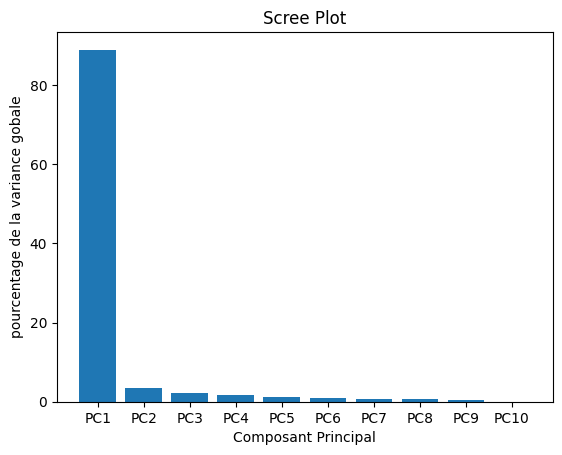

In [179]:
# Construction du Scree plot

plt.bar(x=labels,height=pc_var)
plt.ylabel('pourcentage de la variance gobale')
plt.xlabel('Composant Principal')
plt.title('Scree Plot')
plt.show()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.424048,0.541133,0.581176,-0.128794,-0.131302,-1.256303,-0.450888,1.811616,0.010353,1.184150e-15
wt2,-9.523115,-1.929573,-2.100995,-0.498770,2.357377,0.338178,0.097649,-0.126363,-0.005397,1.184150e-15
wt3,-9.262991,0.629938,2.875028,-1.207155,0.070375,1.625812,0.426057,-0.155390,0.156223,1.184150e-15
wt4,-9.063297,2.808265,-2.301957,-0.574561,-1.541696,-0.126840,0.636909,-0.559652,-0.083199,1.184150e-15
wt5,-9.848920,-1.953679,0.886169,2.360005,-0.798466,-0.527543,-0.685659,-0.944399,-0.018917,1.184150e-15
ko1,9.260801,-2.409387,0.591499,-0.620461,-0.466950,-1.003128,1.802202,-0.040580,-0.331528,1.184150e-15
ko2,9.179977,-0.673502,-0.226268,-1.546192,-0.549010,0.281925,-1.504617,-0.174222,-1.209341,1.184150e-15
ko3,9.922124,-1.331504,-1.167457,0.504404,-1.026229,1.255164,-0.251943,0.637667,1.259844,1.184150e-15
ko4,9.457042,1.978686,0.787300,-0.617656,1.098461,-1.252138,-0.532868,-0.786879,1.032962,1.184150e-15
ko5,9.302427,2.339623,0.075505,2.329179,0.987439,0.664874,0.463156,0.338202,-0.810999,1.184150e-15


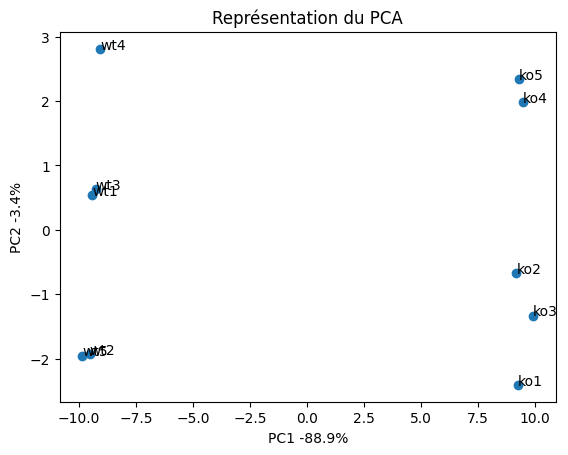

In [180]:
# construction d'un dataframe avec en index les nouvelles données 'scaled' et en colonne les PC's

pca_df= pd.DataFrame(pca_data, index=wt+ko,columns=labels)
display(pca_df)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('Représentation du PCA')
plt.xlabel('PC1 -{0}%'.format(pc_var[0]))
plt.ylabel('PC2 -{0}%'.format(pc_var[1]))

for x in pca_df.index:
    plt.annotate(x,(pca_df.PC1.loc[x],pca_df.PC2.loc[x]))

plt.show()

In [186]:
loading_scores =pd.Series(pca.components_[0],index=genes)

sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)


top_10_genes = sorted_loading_scores[0:10].index.values
print(sorted_loading_scores[top_10_genes])

gene40    0.106004
gene50    0.105997
gene79    0.105970
gene59    0.105953
gene32    0.105947
gene28    0.105943
gene22    0.105905
gene47    0.105902
gene24    0.105902
gene75    0.105898
dtype: float64
